# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/drive/My Drive/Colab/CVDL/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

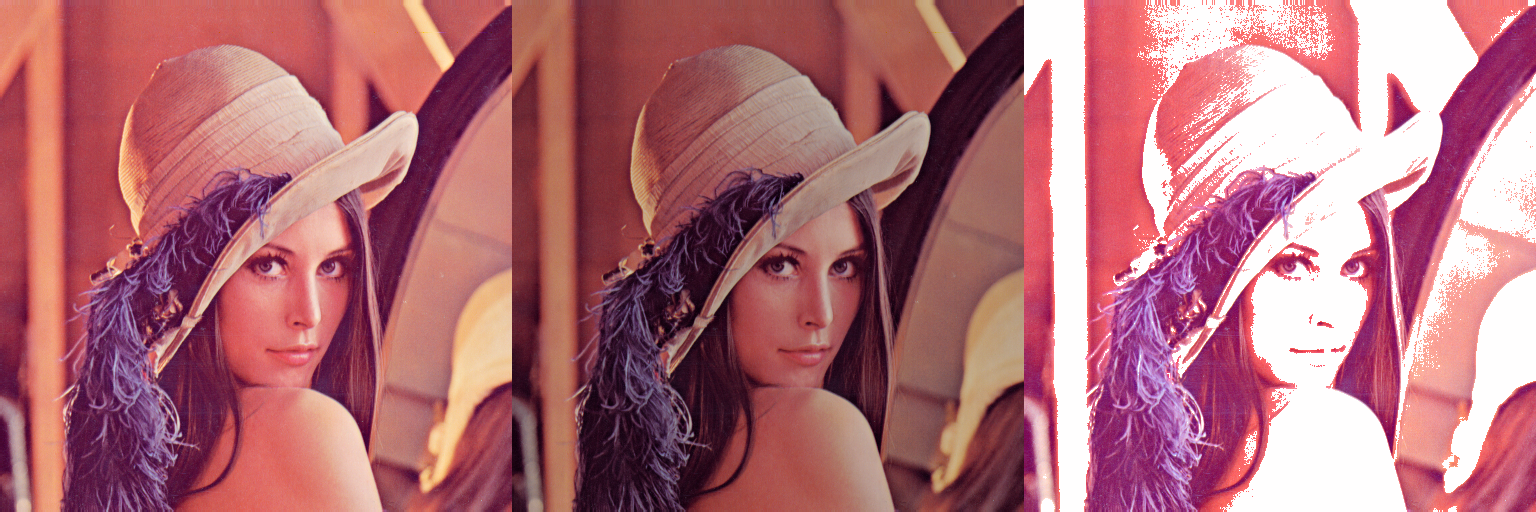

In [4]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
#print(img_hsv_down.dtype)
img_hsv_down[..., -1] = img_hsv_down[..., -1]/255 - change_percentage
img_hsv_down[img_hsv_down[..., -1] < 0] = 0
img_hsv_down[..., -1] = img_hsv_down[..., -1]*255
img_hsv_down = img_hsv_down.astype('uint8')


# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., -1] = img_hsv_up[..., -1]/255 + change_percentage
img_hsv_up[img_hsv_up[..., -1] > 1] = 1
img_hsv_up[..., -1] = img_hsv_up[..., -1]*255
img_hsv_up = img_hsv_up.astype('uint8')


# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
#while True:
cv2_imshow(img_hsv_change)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

3


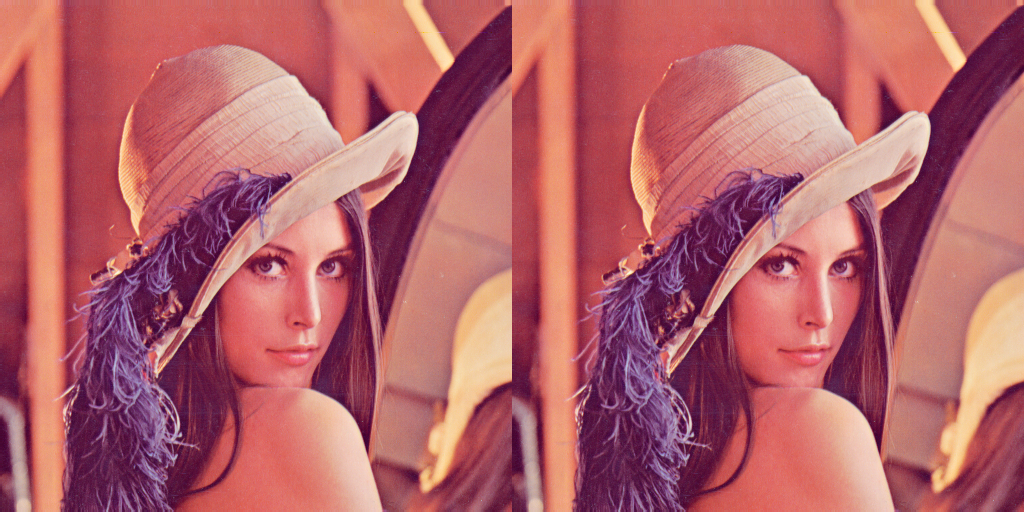

In [30]:
# case 1
# 每個 channel 個別做直方圖均衡
channels = cv2.split(img)
print (len(channels))
cv2.equalizeHist(channels[0])
cv2.equalizeHist(channels[1])
cv2.equalizeHist(channels[2])
# 組合經過直方圖均衡的每個 channel
img_bgr_equal=cv2.merge(channels)
img_equalHist = np.hstack((img, img_bgr_equal))
cv2_imshow(img_equalHist)



3


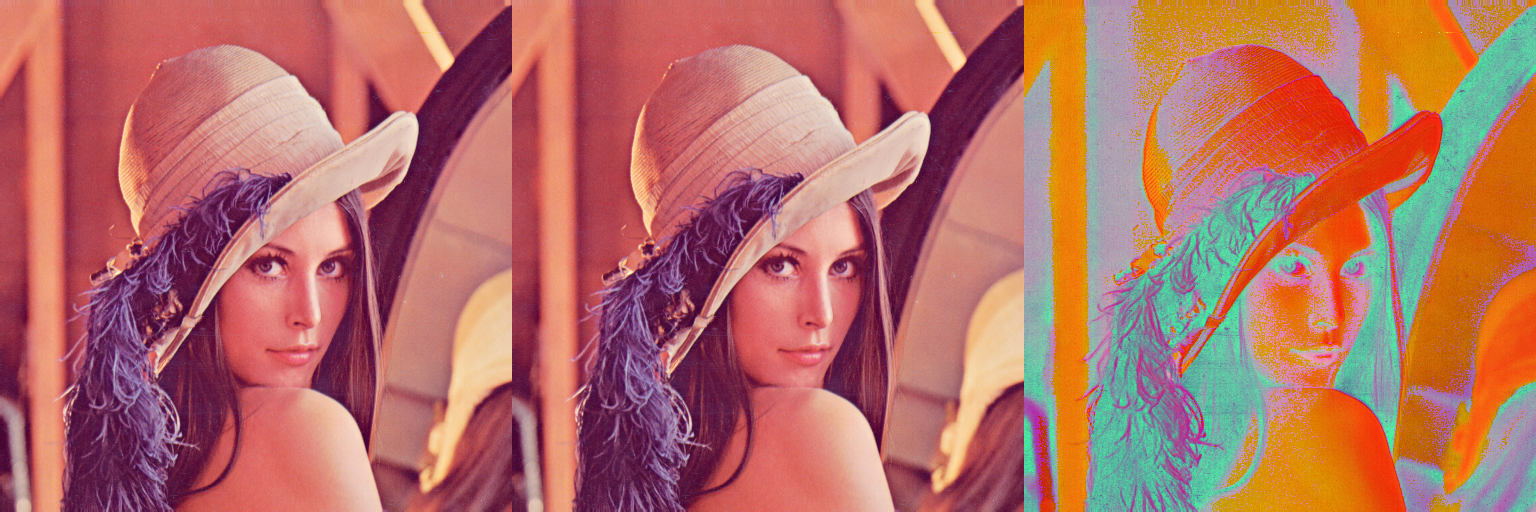

In [31]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv_equal = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
channels = cv2.split(img_hsv_equal)
print (len(channels))
cv2.equalizeHist(channels[0])
# 組合經過直方圖均衡的每個 channel
img_hsv_equal=cv2.merge(channels)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
cv2_imshow(img_bgr_equalHist)

## 調整對比 / 明亮

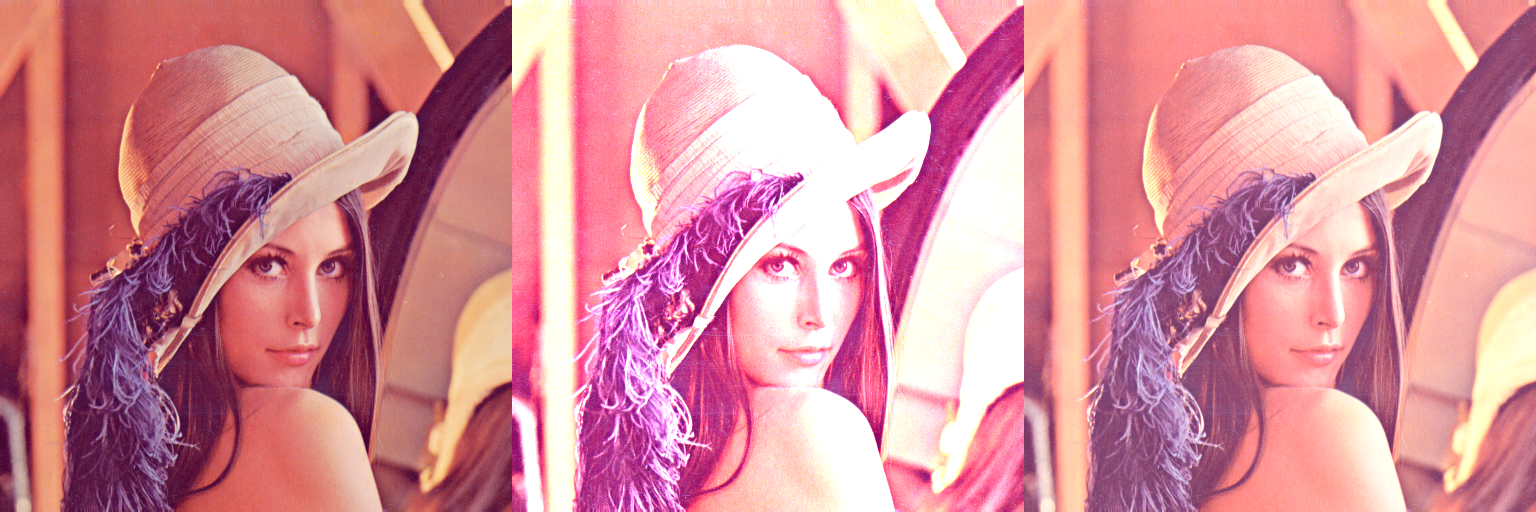

In [32]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))

# 比較不同程度的對比 / 明亮
cv2_imshow( img_contrast_light)